In [213]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import random

In [214]:
class Applicant:
    def __init__(self, name, preferences_of_school):
        self.name = name
        self.preferences_of_school = preferences_of_school
        self.proposal_index = 0  # Индекс в списке предпочтений, куда была сделана предложение
        self.partner = None  # Проект, с которым студент образует пару

    def make_proposal(self):
        # Метод для сделать предложение выбранным проектом из списка предпочтений
        preference_of_school = self.preferences_of_school[self.proposal_index]
        self.proposal_index += 1
        return preference_of_school

    def receive_partner(self, partner):
        # Метод для добавления проекта
        self.partner = partner

    def is_free(self):
        # Метод, возвращающий True, если студент свободен и еще не образовал пару
        return self.partner is None


class Project:
    def __init__(self, name, capacity, preferences_of_students):
        self.name = name
        self.capacity = capacity  # количество
        self.preferences_of_students = preferences_of_students  # предпочтения проекта
        self.applicants = []

    def add_applicant(self, applicant):
        # Метод для добавления студента в список принятых проектом
        self.applicants.append(applicant)

    def remove_applicant(self, applicant):
        # Метод для удаления студента из списка принятых проектом
        self.applicants.remove(applicant)

    def has_capacity(self):
        # Метод, возвращающий True, если в проекте есть свободные места
        return len(self.applicants) < self.capacity

    def prefers_applicant(self, applicant):
        # Метод, проверяющий, предпочитает ли проекта данный студент
        return applicant in self.preferences_of_students[:self.capacity]

    # def prefers_applicant(self, applicant, current_partner):
    #     # Метод, проверяющий, предпочитает ли проект данный студент своему текущему партнеру
    #     return self.preferences_of_students.index(applicant.name) < self.preferences_of_students.index(current_partner.name)

    def get_least_preferred_applicant(self):
        # Метод, возвращающий наименее предпочитаемого студента в проекте
        return self.applicants[-1]


def gale_shapley(applicants, schools):
    #[print(elem.name) for elem in applicants]
    while True:
        free_applicants = [applicant for applicant in applicants if applicant.is_free()]
        #print(applicants)

        if not free_applicants:
            break

        for applicant in free_applicants:
            #print(applicant.name)
            school_name = str(applicant.make_proposal())
            school = schools[school_name]

            if school.has_capacity():
                school.add_applicant(applicant)
                applicant.receive_partner(school)
                applicant.priority = applicant.preferences_of_school.index(school.name) + 1
            else:
                least_preferred_applicant = school.get_least_preferred_applicant()

            if school.prefers_applicant(applicant):
                school.remove_applicant(least_preferred_applicant)
                least_preferred_applicant.receive_partner(None)

                school.add_applicant(applicant)
                applicant.receive_partner(school)

    matches = [[applicant, applicant.partner] for applicant in applicants]
    return matches

In [215]:
def make_ratings_of_students(path_to_score):
    ratings = pd.read_excel(path_to_score)
    ratings = ratings[ratings['Вердикт Лены'] == 'Да']
    ratings = ratings[ratings['В каком хабе будет во втором этапе'] == 'Москва']
    ratings['Балл за зум-собеседование (макс 10)'] = ratings['Балл за зум-собеседование (макс 10)'].replace(
        'нет оценки', np.nan)
    avg_zoom_scores = ratings['Балл за зум-собеседование (макс 10)'].mean()
    ratings['Балл за зум-собеседование (макс 10)'] = ratings['Балл за зум-собеседование (макс 10)'].fillna(
        avg_zoom_scores)
    ratings['Итоговая сумма'] = ratings['Балл за зум-собеседование (макс 10)'] + ratings['Балл за VCV (макс 10)'] + \
                                ratings[
                                    'Оценка за мотивацию (макс 3)'] + ratings['Сумма за кейсы (макс 10)']
    ratings['фамилия + имя'] = ratings['Фамилия кандидата'].str.strip().str.lower() + ' ' + ratings[
        'Имя кандидата'].str.strip().str.lower()
    ratings = ratings[['фамилия + имя', 'Итоговая сумма']]
    ratings = ratings.sort_values(by='Итоговая сумма', ascending=False)
    return ratings

In [216]:
ratings = make_ratings_of_students('Отбор ШМЯ 2023 - финал (1) (3).xlsx')
ratings

,фамилия + имя,Итоговая сумма
76,хажиев роберт,27.00000
7,мировский слава,27.00000
1,зубайдуллин ринат,26.00000
10,алейникова дарья,26.00000
57,овчинников григорий,26.00000
52,мурзаева евгения,26.00000
41,крылов артем,26.00000
32,иванченко алена,25.00000
68,тагиев станислав,25.00000
16,берхольц виктория,25.00000


In [217]:
def func2(ratings, path_to_preferences):
    students_choose_projects = pd.read_excel(path_to_preferences)
    students_choose_projects = students_choose_projects[(students_choose_projects['Твой хаб'] == 'Москва') & (
            students_choose_projects['Направление в ШМЯ'] == 'Управление проектами и продуктами')]
    students_choose_projects['фамилия + имя'] = students_choose_projects['Фамилия'].str.strip().str.lower() + ' ' + \
                                                students_choose_projects['Имя'].str.strip().str.lower()
    students_choose_projects = students_choose_projects.drop(['Фамилия', 'Имя', 'Твой хаб', 'Направление в ШМЯ'],
                                                             axis=1)
    students_choose_projects = students_choose_projects.astype(str)
    students_choose_projects = pd.merge(students_choose_projects, ratings, on='фамилия + имя').sort_values(
        by='Итоговая сумма', ascending=False)
    return students_choose_projects

In [218]:
students_choose_projects = func2(ratings, '2023-06-12 ShMIa 2023 vybor proekta.xlsx')
students_choose_projects

,1 приоритет,2 приоритет,3 приоритет,4 приоритет,5 приоритет,6 приоритет,7 приоритет,8 приоритет,9 приоритет,10 приоритет,11 приоритет,12 приоритет,13 приоритет,14 приоритет,15 приоритет,фамилия + имя,Итоговая сумма
36,50,49,25,23,29,37,24,45-46,28,56-57,43,33,14,15,21,мировский слава,27.00000
16,28,26,25,33,47,22,37,51,39,16,50,18,38,45-46,13,хажиев роберт,27.00000
10,33,25,47,26,38,16,31,51,48,29,22,18,43,45-46,12,крылов артем,26.00000
7,48,19,32,14,33,12,45-46,40,38,31,47,34-35,20,28,25,мурзаева евгения,26.00000
8,19,22,33,31,37,45-46,47,48,34-35,51,14,25,26,38,32,овчинников григорий,26.00000
20,47,31,36,32,37,20,34-35,50,48,12,33,45-46,14,38,24,зубайдуллин ринат,26.00000
2,14,13,49,43,48,31,19,50,56,57,12,22,50,40,47,алейникова дарья,26.00000
32,37,47,33,50,38,32,39,22,48,51,26,29,31,17,12,тагиев станислав,25.00000
29,48,45-46,33,38,29,47,43,30,17,31,26,13,44,19,12,иванченко алена,25.00000
42,54,53,52,55,30,32,45-46,45-46,23,24,14,13,19,33,12,берхольц виктория,25.00000


In [219]:
cols = ['1 приоритет', '2 приоритет', '3 приоритет', '4 приоритет', '5 приоритет', '6 приоритет', '7 приоритет',
        '8 приоритет', '9 приоритет', '10 приоритет', '11 приоритет', '12 приоритет', '13 приоритет', '14 приоритет',
        '15 приоритет']
lst_of_all_projects = pd.concat([students_choose_projects[col] for col in cols]).unique()
#lst_of_all_projects

In [220]:
applicants = []
for _, row in students_choose_projects.iterrows():
    name = row['фамилия + имя']  # Использование столбца 'Фамилия + имя' из students_choose_projects
    projects = []
    for i in range(1, 16):  # Итерация по столбцам с приоритетами ('1 приоритет', '2 приоритет', ..., '15 приоритет')
        project = row[str(i) + ' приоритет']  # Получение значения приоритета проекта
        projects.append(project)

    remaining_projects = list(set(lst_of_all_projects) - set(projects))
    random.Random(3).shuffle(remaining_projects)
    projects += remaining_projects

    applicant = Applicant(name, projects)
    applicants.append(applicant)

In [221]:
projects = {}
for project_number in lst_of_all_projects:
    name = str(project_number)
    capacity = 2 if name == '48' else 1  # Устанавливаем capacity=2 для проекта с номером '48', иначе capacity=1
    students = list(
        ratings['фамилия + имя'])  # Заполняем список студентов из столбца 'фамилия + имя' в DataFrame ratings
    project = Project(name, capacity, students)
    projects[name] = project

In [222]:
matches = gale_shapley(applicants, projects)

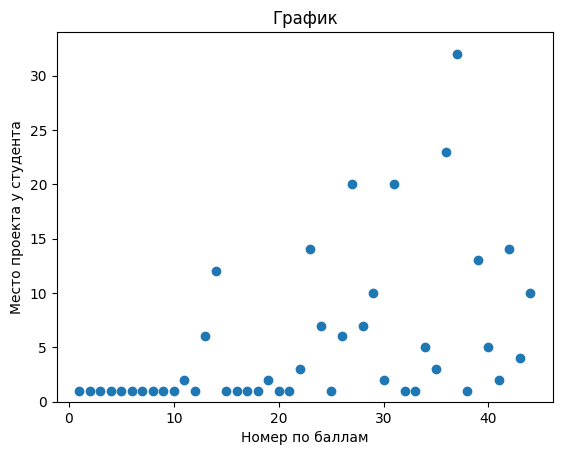

In [223]:
def metrics(matches):
    ind_of_recieved_projects = [matches[i][0].preferences_of_school.index(matches[i][1].name) + 1 for i in
                                range(len(matches))]

    ind_of_recieved_students_by_project = defaultdict(list)
    for elem in matches:
        ind_of_recieved_students_by_project[elem[1].name].append(
            elem[1].preferences_of_students.index(elem[0].name) + 1)

    weight_places = [(len(ind_of_recieved_projects) - i) * ind_of_recieved_projects[i] for i in
                     range(len(ind_of_recieved_projects))]
    return f'среднее место проекта у студентов: {np.mean(ind_of_recieved_projects):.3f}, среднее место студентов у проектов: {np.mean(list(map(np.mean, ind_of_recieved_students_by_project.values()))):.3f}'


def plot(matches):
    ind_of_recieved_projects = [matches[i][0].preferences_of_school.index(matches[i][1].name) + 1 for i in
                                range(len(matches))]

    x = range(1, len(ind_of_recieved_projects) + 1)
    y = ind_of_recieved_projects

    plt.scatter(x, y)
    plt.xlabel('Номер по баллам')
    plt.ylim(0, 34)
    plt.ylabel('Место проекта у студента')
    plt.title('График')
    plt.show()

    return ind_of_recieved_projects


our = plot(matches)

In [224]:
lst_ans = [(elem[0].name, elem[1].name) for elem in matches]
ans = pd.DataFrame(lst_ans).rename({0: 'Фамилия Имя', 1: 'Номер полученного проекта'}, axis=1)
ans.to_excel('ans.xlsx', index=False)

In [225]:
# raspredelenie = pd.read_excel('Студенты по локациям 2023.xlsx', sheet_name='Распределение студентов')
# df = pd.DataFrame(raspredelenie, columns=['Unnamed: 3', 'Unnamed: 7'])
# df['фамилия + имя'] = df['Unnamed: 3'].str.lower()
# df = df.drop('Unnamed: 3', axis=1)
# df = df.rename(columns={'Unnamed: 7': 'проект'})
#
# df['Word Count'] = df['фамилия + имя'].str.split().str.len()
# df_first = df[df['Word Count'] == 2].drop('Word Count', axis=1)
# ##
# df = pd.DataFrame(raspredelenie, columns=['Unnamed: 15', 'Unnamed: 19'])
# df['фамилия + имя'] = df['Unnamed: 15'].str.lower()
# df = df.drop('Unnamed: 15', axis=1)
# df = df.rename(columns={'Unnamed: 19': 'проект'})
#
# df['Word Count'] = df['фамилия + имя'].str.split().str.len()
# df_second = df[df['Word Count'] == 2].drop('Word Count', axis=1)
#
# ##
#
# cur_raspredelenie = pd.concat([df_first, df_second], axis=0)
# cur_raspredelenie['проект'] = cur_raspredelenie['проект'].astype(str)
# cur_raspredelenie['фамилия + имя'] = cur_raspredelenie['фамилия + имя'].str.replace('ё', 'е').str.strip()

In [226]:
# dict_with_raspredelenie = cur_raspredelenie.set_index('фамилия + имя')['проект'].to_dict()

In [227]:
# cur_matches = matches.copy()

In [228]:
# for i in range(len(cur_matches)):
#     cur_matches[i][1] = projects[dict_with_raspredelenie[cur_matches[i][0].name]]
#     cur_matches[i][0].partner = projects[dict_with_raspredelenie[cur_matches[i][0].name]]
# #cur_matches

In [229]:
# [print(elem[0].name, elem[0].proposal_index) for elem in cur_matches]
# None

In [230]:
# his = plot(matches)
# metrics(matches)

In [231]:
# plt.figure()
#
# plt.scatter(x=range(1, len(our) + 1), y=our, color='red', label='автоматическое')
# plt.xlabel('Номер по баллам')
# plt.scatter(x=range(1, len(his) + 1), y=[elem - 0.2 for elem in his], color='blue', label='ручное')
# plt.ylabel('Место проекта у студента')
# plt.legend()
#
# plt.show()